**All mouse samples**

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# Load data

adata_donors = sc.read_h5ad("../data/pooled_data/mouse_donorwise_pooled.h5ad")
adata = sc.read_h5ad("../data/pooled_data/mouse_tissuewise_pooled.h5ad")

In [3]:
adata_donors

AnnData object with n_obs × n_vars = 8215 × 7760
    obs: 'sample', 'n_genes'

In [4]:
adata

AnnData object with n_obs × n_vars = 8215 × 7760
    obs: 'sample', 'n_genes'

In [5]:
# A function to preprocess the samples

def preprocess(adata):

    sc.pp.normalize_total(adata, target_sum=1e4) # normalize

    sc.pp.log1p(adata)    # log transform

    sc.pp.highly_variable_genes(adata)      # get highly variant genes

    # Filter to keep only highly variable genes
    adata = adata[:, adata.var.highly_variable]

    return adata

In [6]:
adata_donors = preprocess(adata_donors)
adata = preprocess(adata)

In [7]:
# Use the same principal components as the authors

sc.pp.pca(adata, n_comps=20)

/home/eleni/anaconda3/envs/sc_project/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


In [8]:
# t-SNE with default parameters

sc.tl.tsne(adata, random_state=42)

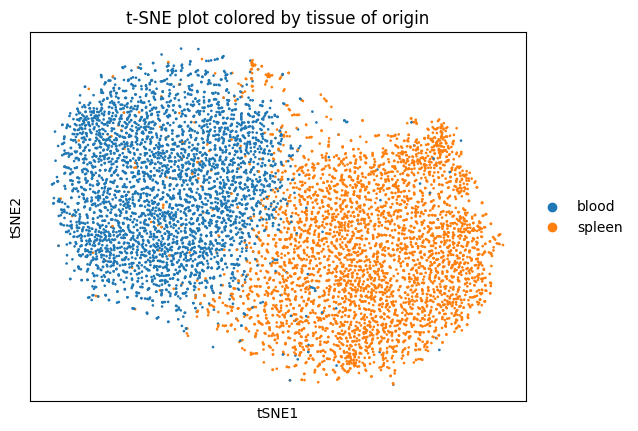

In [9]:
sc.pl.tsne(adata, color=['sample'], show=False)
plt.title('t-SNE plot colored by tissue of origin')
plt.show()

In [10]:
sc.pp.pca(adata_donors, n_comps=20)

/home/eleni/anaconda3/envs/sc_project/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


In [11]:
sc.tl.tsne(adata_donors, random_state=42)

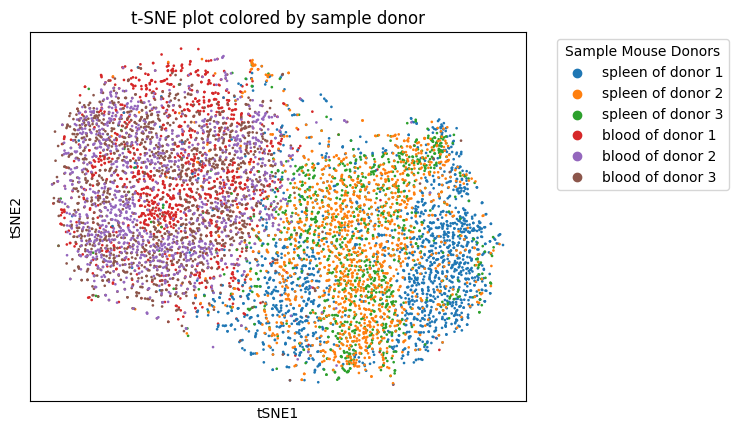

In [12]:
sc.pl.tsne(adata_donors, color=['sample'], show=False)
# Add a title
plt.title('t-SNE plot colored by sample donor')

ax = plt.gca()

# Customize the legend labels
handles, labels = ax.get_legend_handles_labels()

# Map the original labels to the new labels
new_labels = {
    '1m': 'spleen of donor 1',
    '2m': 'spleen of donor 2',
    '3m': 'spleen of donor 3',
    '4m': 'blood of donor 1',
    '5m': 'blood of donor 2',
    '6m': 'blood of donor 3',  
}

# Update the legend with the new labels
new_labels_list = [new_labels.get(label, label) for label in labels]

# Place the legend outside the plot
ax.legend(handles, new_labels_list, title='Sample Mouse Donors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with the customized legend
plt.show()

In [13]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/eleni/anaconda3/envs/sc_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


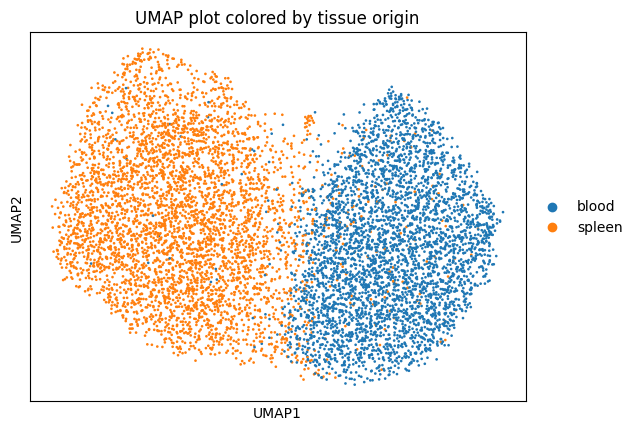

In [14]:
sc.pl.umap(adata, color=['sample'], show=False)
plt.title('UMAP plot colored by tissue origin')
plt.show()

In [15]:
# UMAP with default parameters

sc.pp.neighbors(adata_donors, random_state=42)
sc.tl.umap(adata_donors, random_state=42)

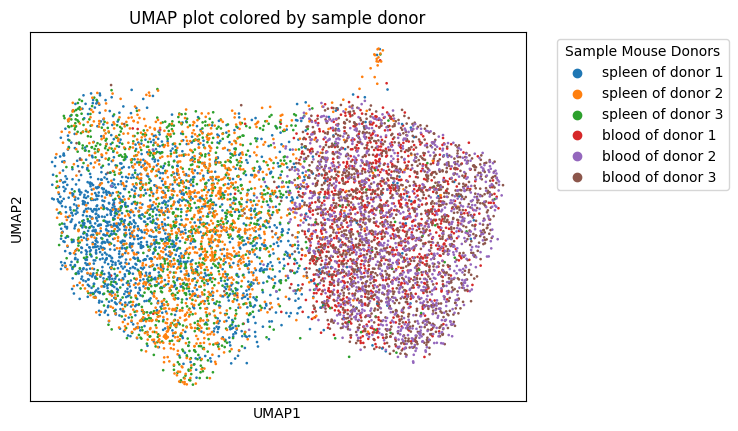

In [16]:
sc.pl.umap(adata_donors, color=['sample'], show=False)
plt.title('UMAP plot colored by sample donor')

ax = plt.gca()
# Customize the legend labels
handles, labels = ax.get_legend_handles_labels()

# Map the original labels to the new labels
new_labels = {
    '1m': 'spleen of donor 1',
    '2m': 'spleen of donor 2',
    '3m': 'spleen of donor 3',
    '4m': 'blood of donor 1',
    '5m': 'blood of donor 2',
    '6m': 'blood of donor 3',  
}

# Update the legend with the new labels
new_labels_list = [new_labels.get(label, label) for label in labels]

# Place the legend outside the plot
ax.legend(handles, new_labels_list, title='Sample Mouse Donors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with the customized legend
plt.show()

In [17]:
adata.obs['sample']

AAACCTGCATTAGGCT    blood
AAACCTGGTCCGCTGA    blood
AAACCTGGTTTGACAC    blood
AAACCTGTCCACGTTC    blood
AAACGGGAGTGAATTG    blood
                    ...  
TTTGGTTCAACACGCC    blood
TTTGGTTGTTAAGACA    blood
TTTGGTTTCTCAAACG    blood
TTTGTCAAGGAATGGA    blood
TTTGTCATCAGCTGGC    blood
Name: sample, Length: 8215, dtype: category
Categories (2, object): ['blood', 'spleen']

**Identify marker genes**

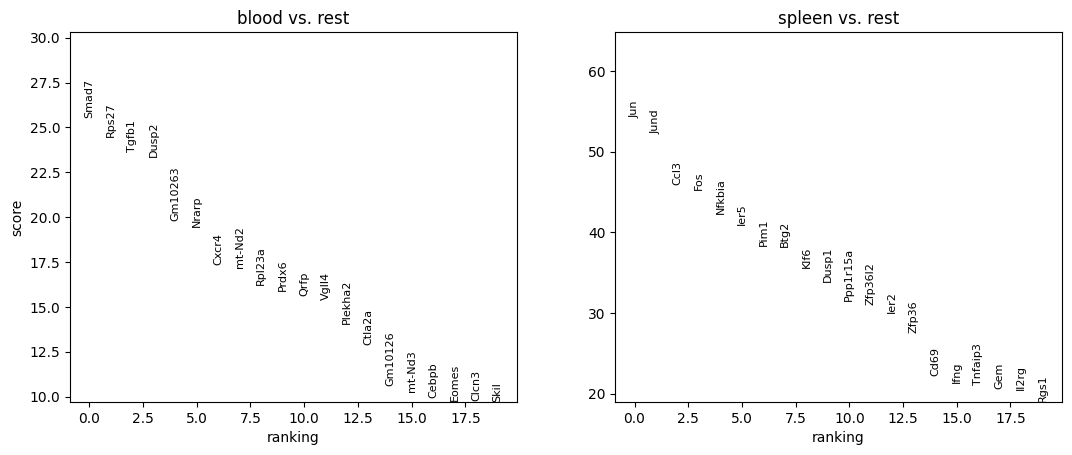

In [18]:
# Identify marker genes
sc.tl.rank_genes_groups(adata, groupby='sample', method='wilcoxon', n_genes=20)

# Visualize the top marker genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

**Heatmap**

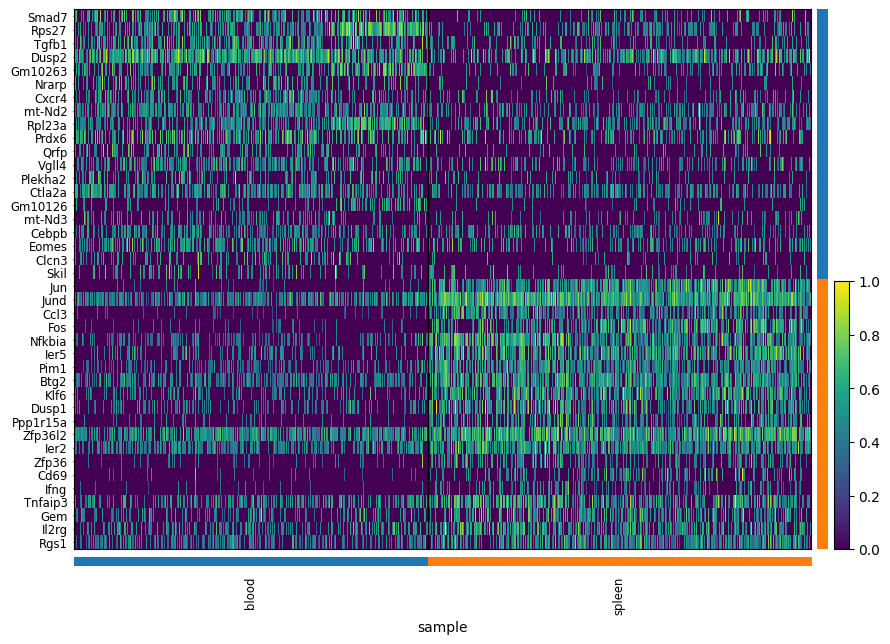

In [19]:
# Extract marker genes information
markers = adata.uns['rank_genes_groups']
cluster_key = 'sample'

adata.obs[cluster_key] = adata.obs[cluster_key].astype(str)

# Plot the marker genes using a heatmap
sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=20,
    groupby=cluster_key,
    show_gene_labels=True,
    swap_axes = True,
    standard_scale='var',
    dendrogram=False
)

**Marker genes per cluster**

In [20]:
markers = adata.uns['rank_genes_groups']['names']

blood_markers = []
spleen_markers = []

for gene_tuple in markers:
    blood_markers.append(gene_tuple[0])
    spleen_markers.append(gene_tuple[1])

In [21]:
print(blood_markers)
print(spleen_markers)

['Smad7', 'Rps27', 'Tgfb1', 'Dusp2', 'Gm10263', 'Nrarp', 'Cxcr4', 'mt-Nd2', 'Rpl23a', 'Prdx6', 'Qrfp', 'Vgll4', 'Plekha2', 'Ctla2a', 'Gm10126', 'mt-Nd3', 'Cebpb', 'Eomes', 'Clcn3', 'Skil']
['Jun', 'Jund', 'Ccl3', 'Fos', 'Nfkbia', 'Ier5', 'Pim1', 'Btg2', 'Klf6', 'Dusp1', 'Ppp1r15a', 'Zfp36l2', 'Ier2', 'Zfp36', 'Cd69', 'Ifng', 'Tnfaip3', 'Gem', 'Il2rg', 'Rgs1']
